In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

#Common Model Helpers
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import models
from keras import layers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Conv2D, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, Input, Activation, Dense, Flatten

Using TensorFlow backend.


# 1. Preparing the Data:

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train.shape

(60000, 785)

In [4]:
test.shape

(10000, 785)

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
y_test = test['label']

In [8]:
test = test.drop('label',axis=1)

In [9]:
test.shape

(10000, 784)

In [10]:
y = train['label']
train = train.drop('label',axis =1)

In [11]:
print(train.shape)
print(y.shape)

(60000, 784)
(60000,)


In [12]:
train = np.array(train)
test = np.array(test)

In [13]:
print(train.max())
print(train.min())

255
0


In [14]:
train = train.reshape((60000,28,28,1))
test = test.reshape((10000,28,28,1))

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size=0.20, train_size=0.80, random_state=42)

In [16]:
X_train = X_train /255.0 #Rescale the pixel data
X_valid = X_valid / 255.0

In [17]:
print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


# 2. Image Peek:

In [18]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

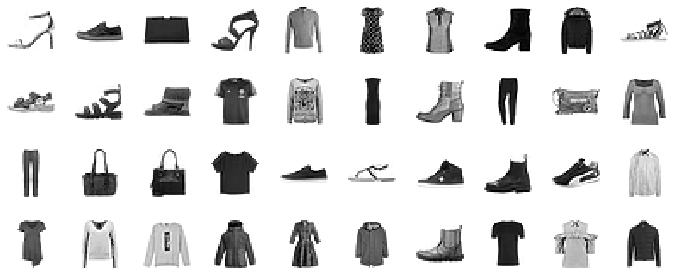

In [19]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 3. Modelling:

In [20]:
model = Sequential()             
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)))      
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=32,kernel_size=(6,6),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
        
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(BatchNormalization())
        
model.add(Dense(10))
model.add(Activation("softmax"))
        
model.compile(optimizer = 'adam' ,metrics=["accuracy"], loss = "sparse_categorical_crossentropy")

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        36896     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [22]:
model.fit(X_train,y_train,epochs = 4, validation_data = (X_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 519s 11ms/step - loss: 0.3775 - accuracy: 0.8655 - val_loss: 0.3675 - val_accuracy: 0.8656
Epoch 2/15
48000/48000 [==============================] - 516s 11ms/step - loss: 0.2461 - accuracy: 0.9109 - val_loss: 0.3469 - val_accuracy: 0.8652
Epoch 3/15
48000/48000 [==============================] - 514s 11ms/step - loss: 0.1939 - accuracy: 0.9284 - val_loss: 0.3151 - val_accuracy: 0.8882
Epoch 4/15
48000/48000 [==============================] - 510s 11ms/step - loss: 0.1454 - accuracy: 0.9461 - val_loss: 0.2542 - val_accuracy: 0.9125
Epoch 5/15
48000/48000 [==============================] - 3598s 75ms/step - loss: 0.1055 - accuracy: 0.9619 - val_loss: 0.2628 - val_accuracy: 0.9135
Epoch 6/15
48000/48000 [==============================] - 495s 10ms/step - loss: 0.0746 - accuracy: 0.9736 - val_loss: 0.3188 - val_accuracy: 0.9085
Epoch 7/15
48000/48000 [==============================]

# 3. Results:

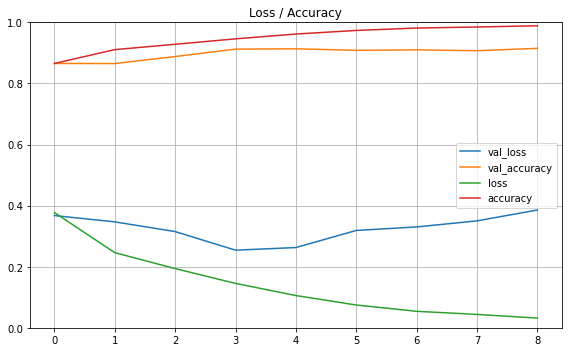

In [23]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.title('Loss / Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.tight_layout()
plt.show()

In [24]:
test_accu = model.evaluate(test,y_test)

10000/10000 [==============================] - 22s 2ms/step


In [25]:
print('The testing accuracy is :',round(test_accu[1]*100,2), '%')

The testing accuracy is : 73.8 %


In [26]:
predictions = model.predict(test)

In [83]:
data_test = pd.read_csv('fashion-mnist_test.csv')

In [151]:
#get the predictions for the test data
predicted_classes = model.predict_classes(test)

In [222]:
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==np.array(y_true))[0]
incorrect = np.nonzero(predicted_classes!=np.array(y_true))[0]

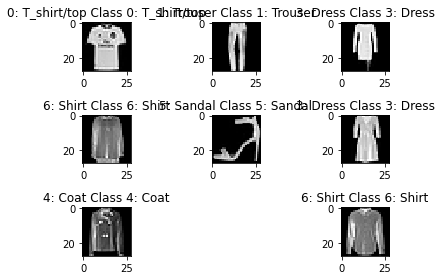

In [223]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test[correct].reshape(28,28), cmap='gray', interpolation='nearest',aspect = 'auto')
    plt.title("Predicted {}: {} Class {}: {}".format(
        predicted_classes[correct], class_names[predicted_classes[correct]], y_true[correct], class_names[y_true[correct]]))
    plt.tight_layout()

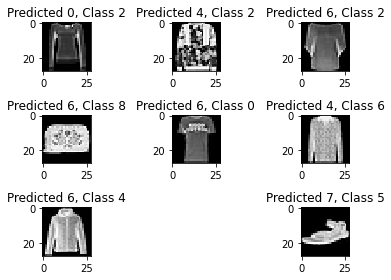

In [149]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()